<a href="https://colab.research.google.com/github/pkpotter03/mainflow-data-analytics-python/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [28]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/netflix.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


# Data Cleaning: Checking for missing values and identifying any outliers or inconsistencies

In [29]:
df.isnull().sum()

,0
title,0
genre,0
language,0
imdb_score,0
premiere,0
runtime,0
year,0


In [30]:
df.describe()

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


#Exploratory Data Analysis (EDA)

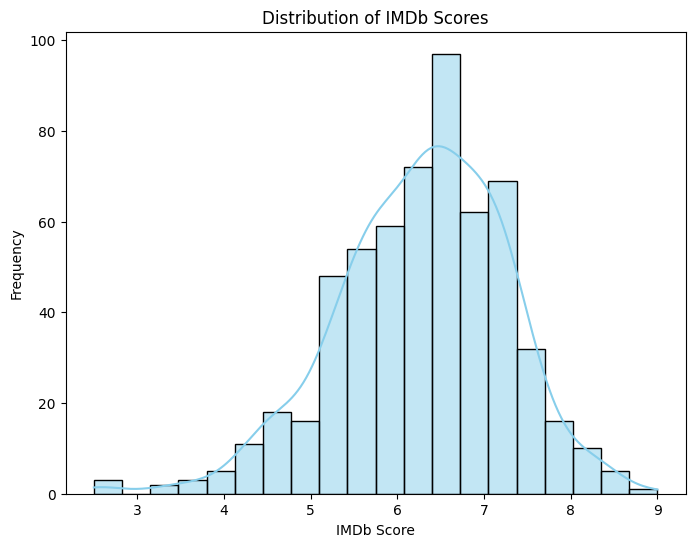

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

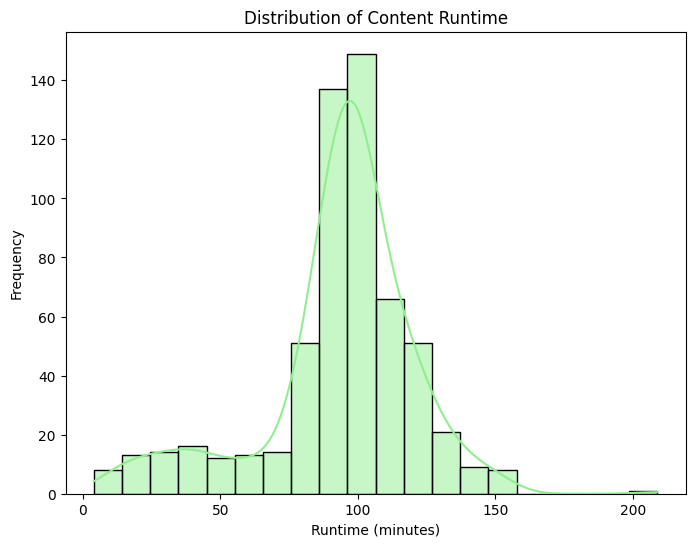

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df['runtime'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Content Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-33-6229000545db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['genre'], order=df['genre'].value_counts().index, palette='coolwarm')


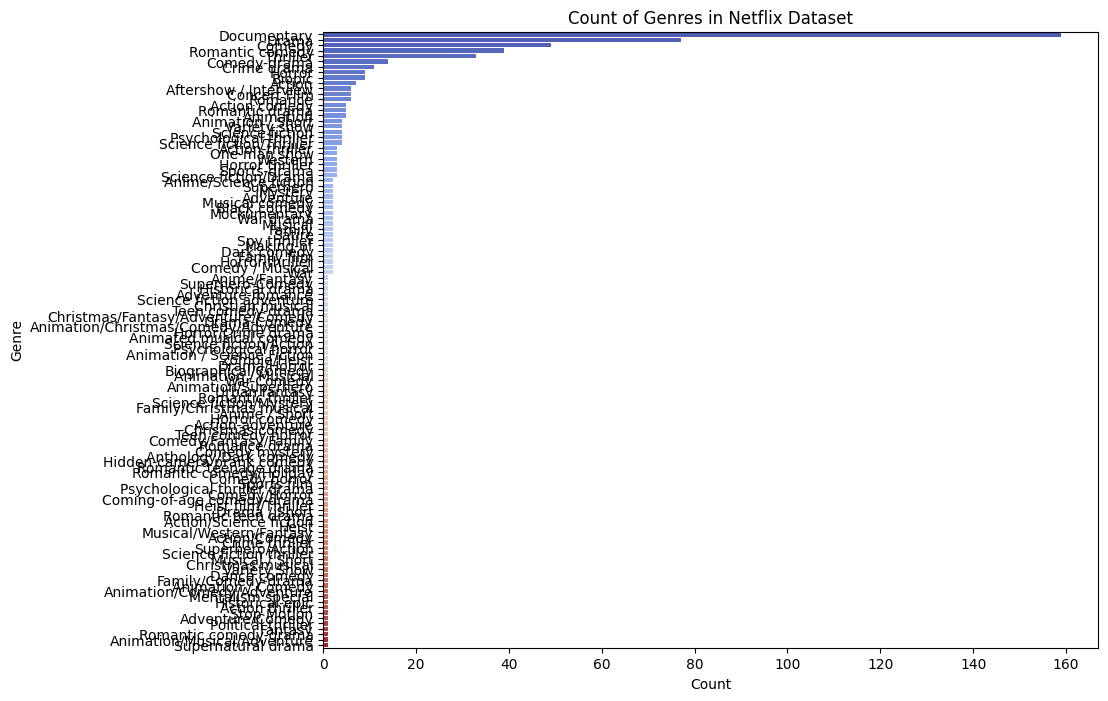

In [33]:
plt.figure(figsize=(10, 8))
sns.countplot(y=df['genre'], order=df['genre'].value_counts().index, palette='coolwarm')
plt.title('Count of Genres in Netflix Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#Question Formulation

In [34]:
# 1. What is the average IMDb score for all content?
df['imdb_score'].mean()

6.275128644939965

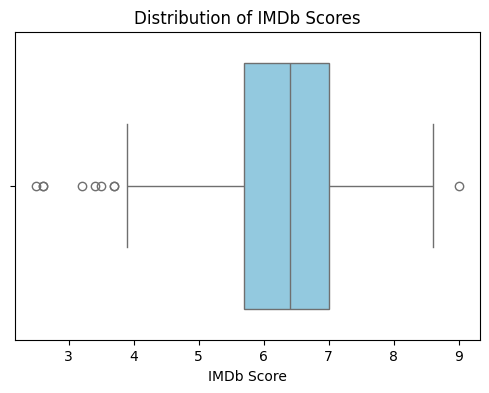

In [37]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['imdb_score'], color='skyblue')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.show()

In [38]:
# 2. What genre has the highest average IMDb score?
df.groupby('genre')['imdb_score'].mean().sort_values(ascending=False)

,imdb_score
genre,
Animation/Christmas/Comedy/Adventure,8.200000
Musical / Short,7.700000
Concert Film,7.633333
Anthology/Dark comedy,7.600000
Animation / Science Fiction,7.500000
...,...
Science fiction/Drama,4.533333
Superhero-Comedy,4.400000
Political thriller,4.300000


<ipython-input-40-cb365161b36f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_imdb.values, y=avg_imdb.index, palette='coolwarm')


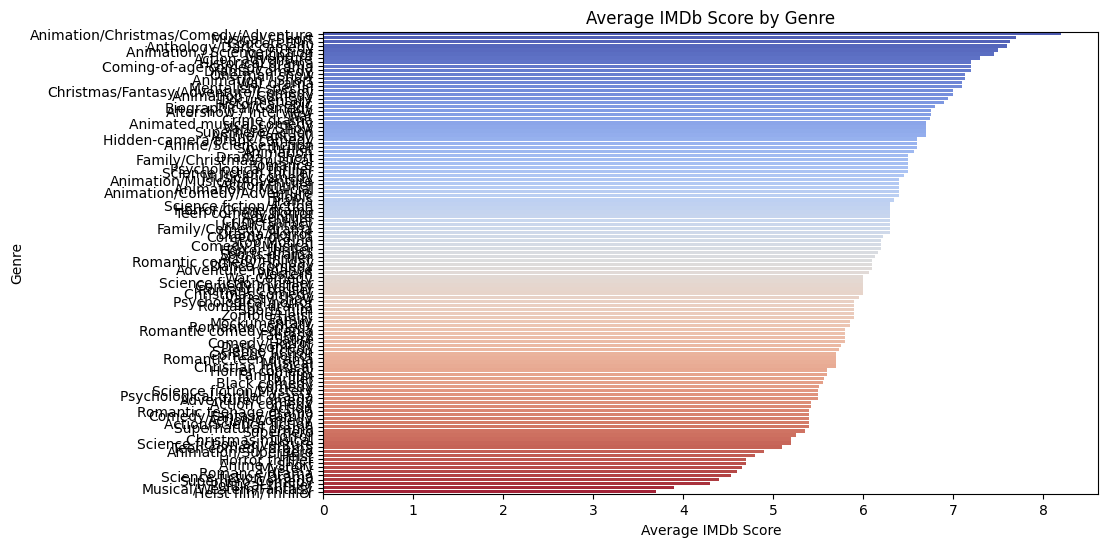

In [40]:
plt.figure(figsize=(10, 6))
avg_imdb = df.groupby('genre')['imdb_score'].mean().sort_values(ascending=False)
sns.barplot(x=avg_imdb.values, y=avg_imdb.index, palette='coolwarm')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.show()

In [41]:
# 3. Which language has the most content available?
df['language'].value_counts().idxmax()

'English'

<ipython-input-43-b7774c02ab27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['language'], order=df['language'].value_counts().index, palette='viridis')


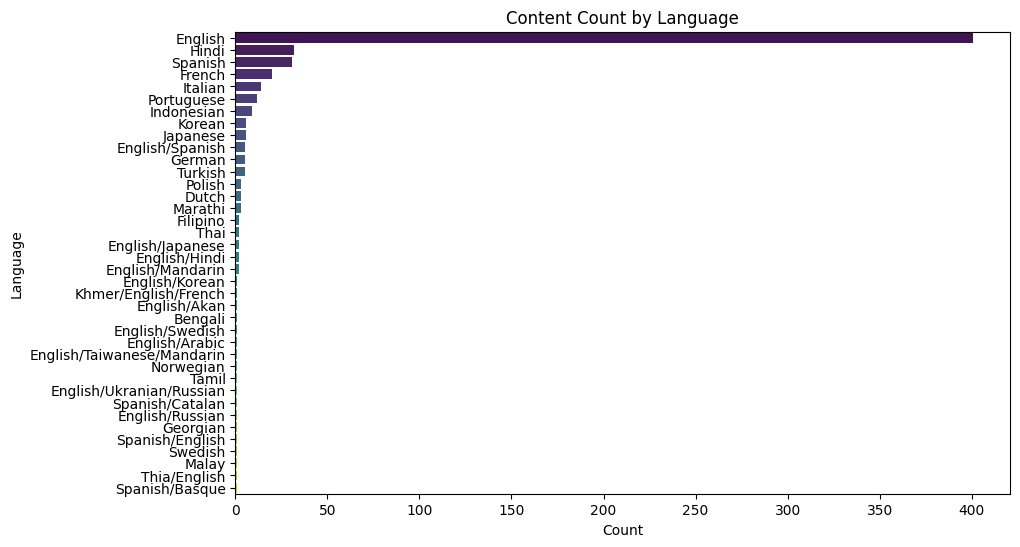

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['language'], order=df['language'].value_counts().index, palette='viridis')
plt.title('Content Count by Language')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [44]:
# 4. What is the distribution of IMDb scores by genre?
df.groupby('genre')['imdb_score'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,7.0,5.414286,1.112697,3.5,4.800,5.70,6.200,6.7
Action comedy,5.0,5.420000,0.791833,4.2,5.100,5.70,5.900,6.2
Action thriller,1.0,6.400000,NaN,6.4,6.400,6.40,6.400,6.4
Action-adventure,1.0,7.300000,NaN,7.3,7.300,7.30,7.300,7.3
Action-thriller,3.0,6.133333,1.026320,5.0,5.700,6.40,6.700,7.0
...,...,...,...,...,...,...,...,...
War,2.0,6.750000,0.636396,6.3,6.525,6.75,6.975,7.2
War drama,2.0,7.100000,0.848528,6.5,6.800,7.10,7.400,7.7
War-Comedy,1.0,6.000000,NaN,6.0,6.000,6.00,6.000,6.0


<ipython-input-45-3798741027be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='imdb_score', y='genre', data=df, palette='coolwarm')


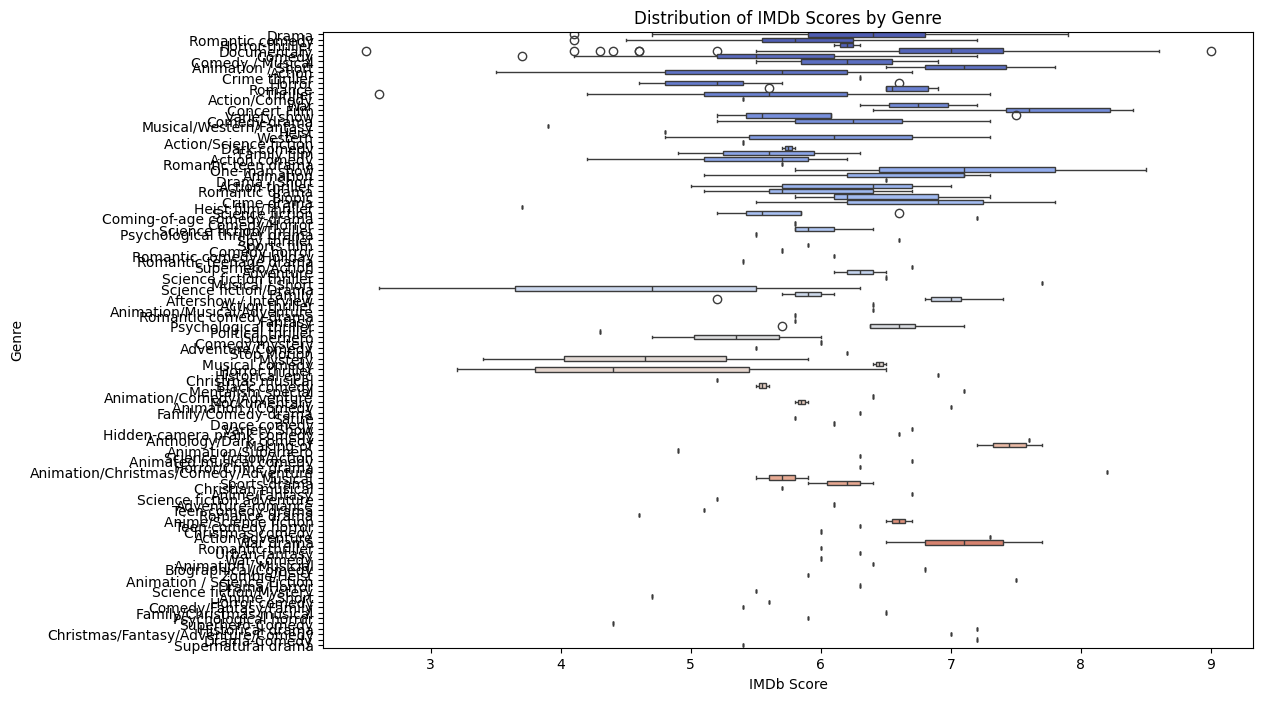

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='imdb_score', y='genre', data=df, palette='coolwarm')
plt.title('Distribution of IMDb Scores by Genre')
plt.xlabel('IMDb Score')
plt.ylabel('Genre')
plt.show()

In [52]:
# 5. Which year had the highest number of content releases?
df['year'].value_counts().idxmax()

2020

<ipython-input-54-abd59881f43f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['year'], palette='Set2')


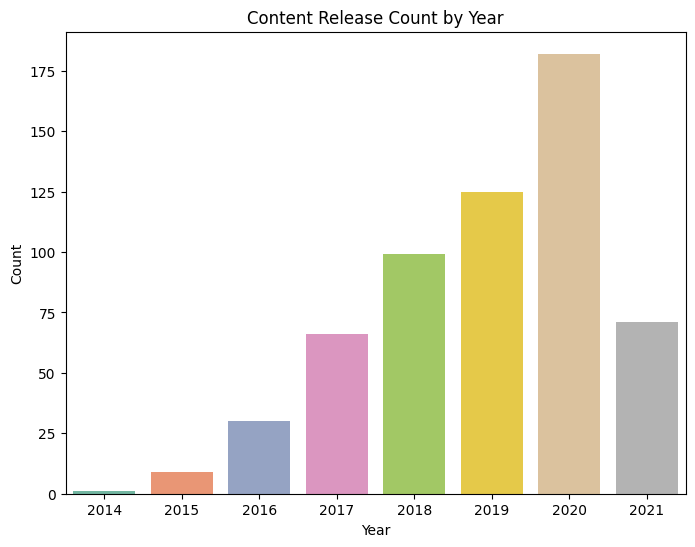

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['year'], palette='Set2')
plt.title('Content Release Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [58]:
# 6. What is the correlation between runtime and IMDb score?
df['runtime'].corr(df['imdb_score'])

-0.034832677404970175

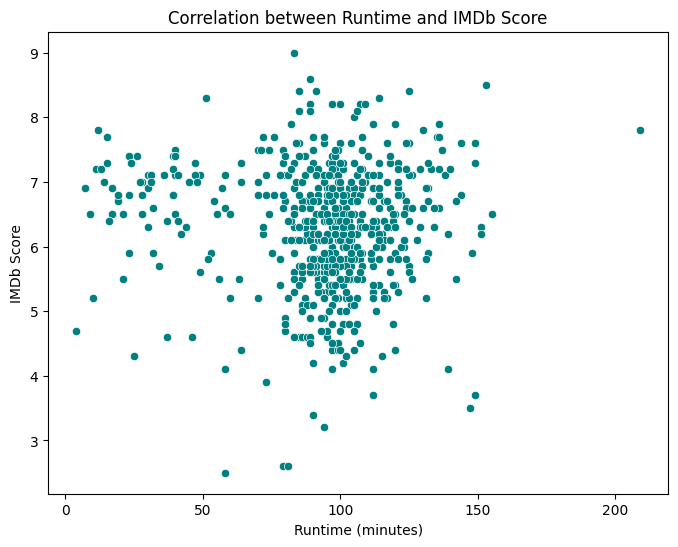

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=df, color='teal')
plt.title('Correlation between Runtime and IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

In [60]:
# 7. Which title has the longest runtime?
df.loc[df['runtime'].idxmax(), 'title']

'The Irishman'

<ipython-input-61-7356878ef747>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime', y='title', data=df.nlargest(5, 'runtime')[['title', 'runtime']], palette='Blues_r')


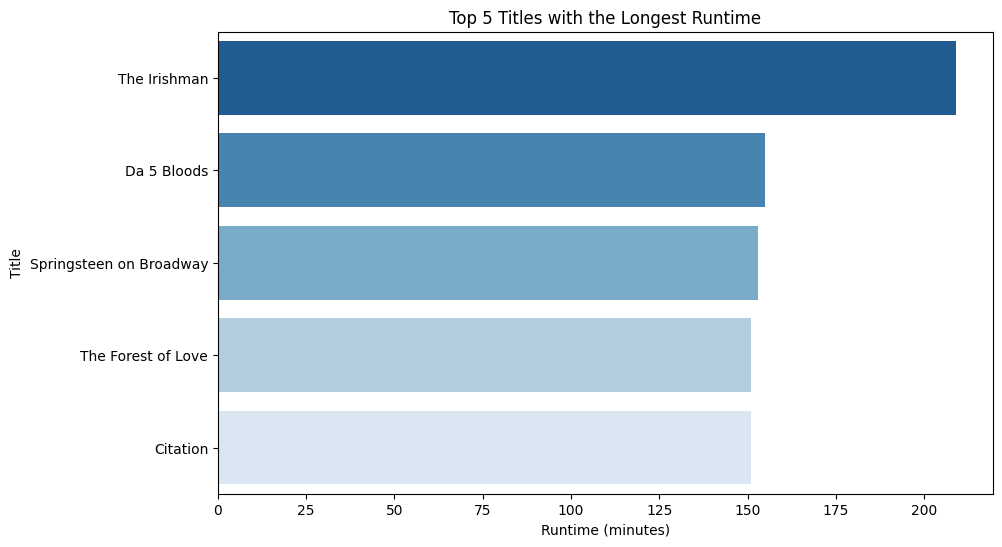

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='runtime', y='title', data=df.nlargest(5, 'runtime')[['title', 'runtime']], palette='Blues_r')
plt.title('Top 5 Titles with the Longest Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Title')
plt.show()